# Student's test

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

In the study of the efficacy of the methylphenidate preparation, 24 patients with attention deficit hyperactivity disorder had either methylphenidate or placebo for a week. At the end of the week, each patient underwent a test for the ability to suppress impulsive behavioral responses. In the second stage, the placebo and the drug changed, and after a week's course, each subject underwent a second test.

It is required to evaluate the effect of the drug.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

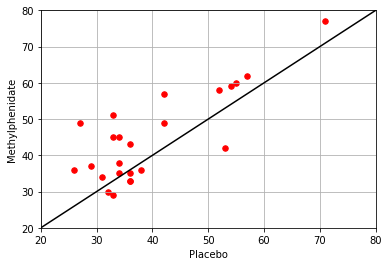

In [4]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

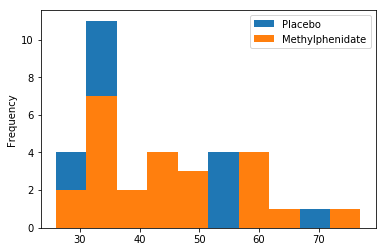

In [5]:
data.plot.hist()
pylab.show()

## t-test one population

Proceeding from the fact that the ability to suppress impulsive behavioral responses is measured on a scale [0, 100], it can be assumed that with a good calibration of the test, the average method for suppressing reactions in the population is 50. Then in order to test the hypothesis that patients in the sample, on average, they are less able to cope with the suppression of impulsive reactions (need treatment), let's check that their ability to suppress reactions differs from the average (not equal to 50). 

$H_0\colon$ the average value of the ability to suppress impulsive behavioral responses is 50.

$H_1\colon$ is not equal to 50.

In [6]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.4380033419051284, pvalue=0.00018894293251080175)

In [7]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


## t-test for two populations (independent samples)

In order to use the two-sample Student test, we will see that the distributions in the samples do not differ significantly from the normal ones.

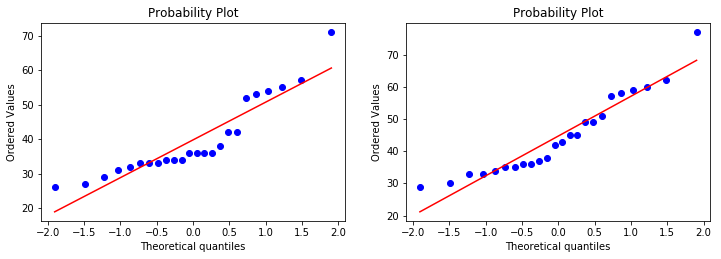

In [8]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Shapiro-Wilk normality test:

 $H_0\colon$ the ability to suppress impulsive reactions are normally distributed
 
 $H_1\colon$ are not normally distributed.

In [9]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [10]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


Using the Student's test, let us test the hypothesis of the equality of the mean of two samples.

t-test:

$H_0\colon$ the means for the ability to suppress impulsive behavioral responses are the same for patients taking the drug, and for patients taking placebo.

$H_1\colon$ are not the same.

In [11]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.15329199774047089)

In [12]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


## t-test for two populations (dependent samples)

In order to use the Student's test for paired samples, let's check that the distribution of pairwise differences does not differ significantly from normal.

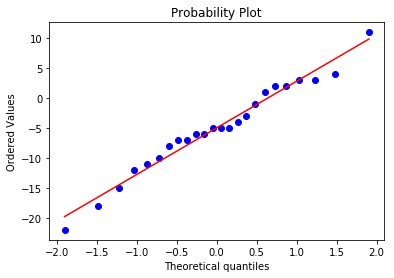

In [13]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Shapiro-Wilk normality test:

$H_0\colon$ pairwise differences are normally distributed.

$H_1\colon$ are not normally distributed.

In [14]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


t-test:

$H_0\colon$ the mean values of the ability to suppress impulsive behavioral responses are the same for patients taking the drug, and for patients taking placebo.

$H_1\colon$ are not the same.

In [15]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [16]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]
